<h1 style="font-size: 48px;">FASHION MNIST</h1>

<p style="font-size: 20px;">Fashion-MNIST is a dataset of images commonly used in machine learning and computer vision research. It contains 70,000 grayscale images of 28x28 pixels each, representing 10 different fashion categories such as T-shirts, dresses, sandals, and sneakers. The dataset is intended to be a more challenging alternative to the traditional MNIST dataset of handwritten digits, as the images are more complex and diverse in appearance. Fashion-MNIST is often used as a benchmark dataset for testing and comparing the performance of different machine learning algorithms and models.</p>

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# IMPORTING DATASETS

In [3]:
df_train = pd.read_csv("./fashion-mnist_train.csv")
df_test  = pd.read_csv("./fashion-mnist_test.csv")

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PREPROCESSING THE DATA

In [6]:
df_train.dropna(how='any', inplace=True)
df_test.dropna(how='any', inplace=True)

<p style="font-size: 20px;">We don't need to create any new features as the ones present in the dataset are the ones we needed.</p>

In [7]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [8]:
X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values

# EXPLORATORY DATA ANALYSIS

In [9]:
# Reshape the images into 28x28 pixel format
images = X.reshape(-1, 28, 28)
label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
               4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

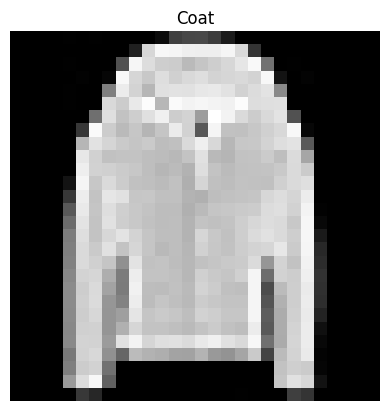

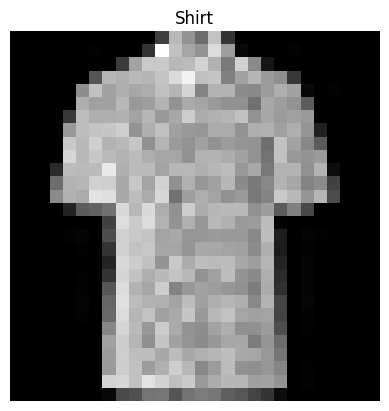

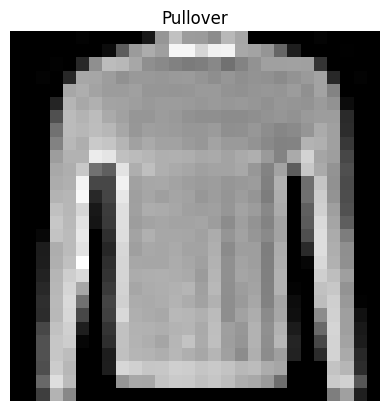

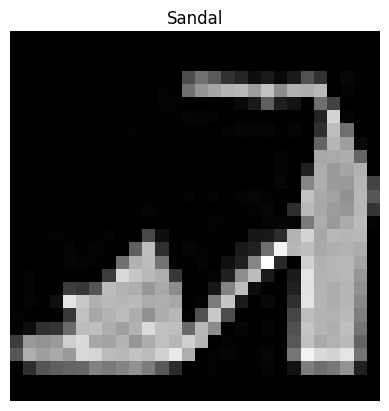

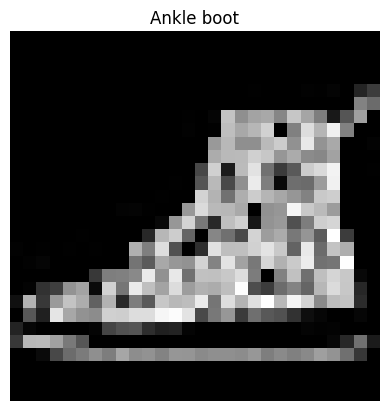

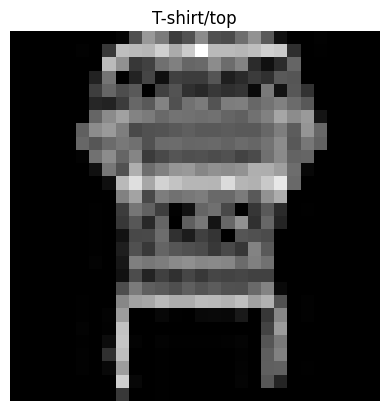

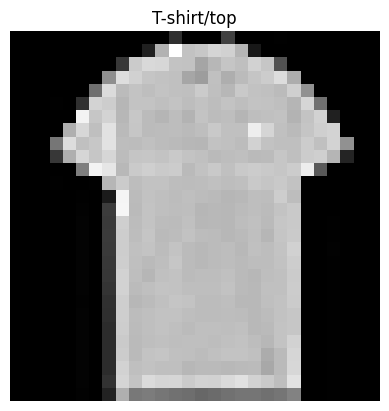

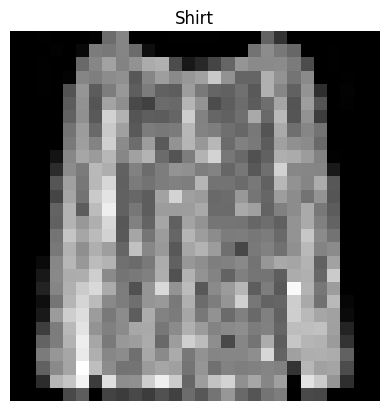

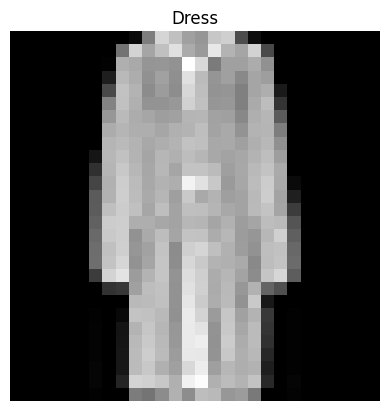

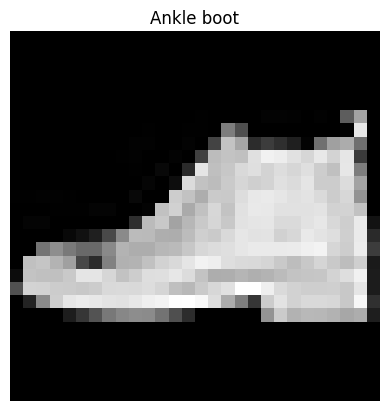

In [10]:
for i in range(10):
    index = np.random.randint(0, len(images))
    image = images[index]
    label = label_names[y[index]]
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

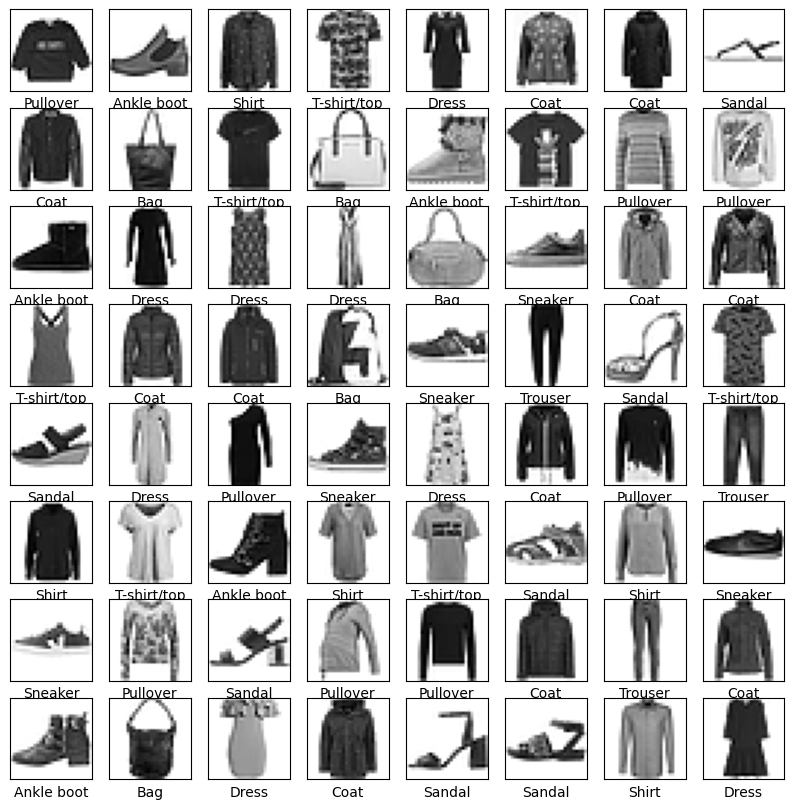

In [11]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some sample images
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])
plt.show()


# MODEL BUILDING

In [12]:
#since X and y are already defined

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=57)

In [15]:
model0 = Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model0.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid])

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4564 - accuracy: 0.8358 - val_loss: 0.3682 - val_accuracy: 0.8670
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3416 - accuracy: 0.8750 - val_loss: 0.3493 - val_accuracy: 0.8741
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3025 - accuracy: 0.8886 - val_loss: 0.3503 - val_accuracy: 0.8763
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.8982 - val_loss: 0.3339 - val_accuracy: 0.8788
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9067 - val_loss: 0.3513 - val_accuracy: 0.8764
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2331 - accuracy: 0.9135 - val_loss: 0.3421 - val_accuracy: 0.8799
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2173 - accuracy: 0.9184 - val_loss: 0.4005 - val_ac

In [18]:
model1 = Sequential([
    layers.Dense(units=128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model1.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid])

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8698 - accuracy: 0.8206 - val_loss: 0.5808 - val_accuracy: 0.8292
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5775 - accuracy: 0.8378 - val_loss: 0.5763 - val_accuracy: 0.8376
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5572 - accuracy: 0.8404 - val_loss: 0.5759 - val_accuracy: 0.8360
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5375 - accuracy: 0.8461 - val_loss: 0.5196 - val_accuracy: 0.8537
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5229 - accuracy: 0.8493 - val_loss: 0.5463 - val_accuracy: 0.8397
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5037 - accuracy: 0.8558 - val_loss: 0.4971 - val_accuracy: 0.8505
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4942 - accuracy: 0.8562 - val_loss: 0.4966 - val_ac

In [21]:
model2 = Sequential([
    layers.Dense(units=128, activation='relu', input_shape=(784,), bias_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid])

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4663 - accuracy: 0.8330 - val_loss: 0.3792 - val_accuracy: 0.8597
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8710 - val_loss: 0.3703 - val_accuracy: 0.8639
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8866 - val_loss: 0.3322 - val_accuracy: 0.8786
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.8944 - val_loss: 0.3362 - val_accuracy: 0.8774
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9030 - val_loss: 0.3254 - val_accuracy: 0.8815
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9082 - val_loss: 0.3472 - val_accuracy: 0.8767
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2334 - accuracy: 0.9127 - val_loss: 0.3489 - val_ac

In [24]:
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [26]:
model0.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 456.4188 - accuracy: 0.5507


[456.4187927246094, 0.5507000088691711]

In [27]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 31.8667 - accuracy: 0.6714


[31.86673355102539, 0.6714000105857849]

In [28]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 254.5826 - accuracy: 0.6483


[254.58258056640625, 0.6482999920845032]